In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [2]:
# load dataset
df = pd.read_csv('fish_data.csv')

# resample 5 observations
df.sample(5)

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
1138,1139,2.68,13.45,lakes,8.0,Green_and_Chocolate,False,5.0
1403,1404,19.16,2.21,ponds,7.7,Orange,False,12.9
292,293,7.42,11.97,lakes,7.5,Reddish_Orange,True,16.0
1338,1339,17.88,15.60,idlewater,6.9,Red_and_White_Bi_Color,True,19.9
1668,1669,19.19,5.95,lakes,7.6,Black_and_Orange,False,13.0


In [3]:
# check for duplicates
df.duplicated().sum()

0

In [4]:
# shape of the dataset
print('The dataset has {} observations and {} variables.'.format(df.shape[0], df.shape[1]))

The dataset has 2000 observations and 8 variables.


In [5]:
# structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


All the variables are in good shape and in full expect `Gender` which has some missing values. These will be imputed later.

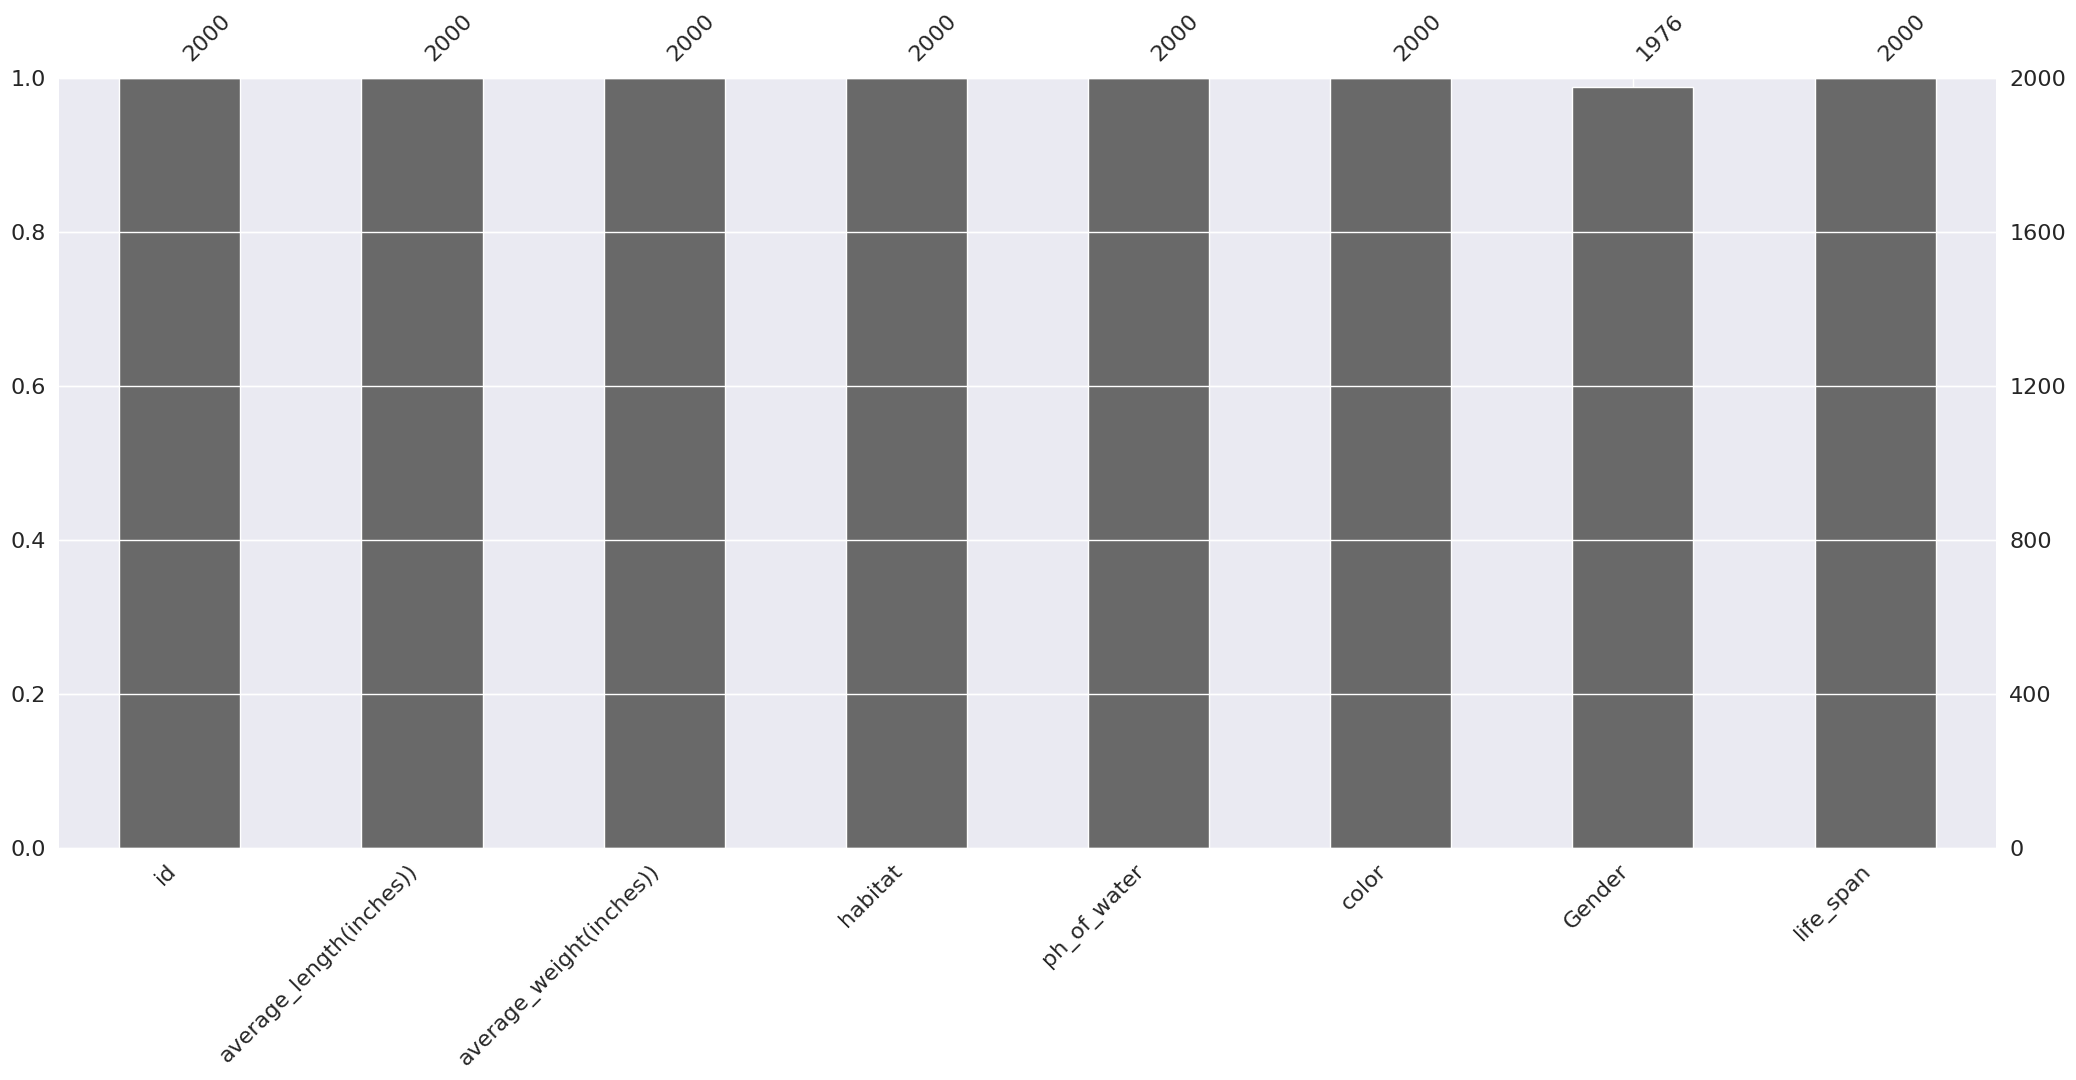

In [6]:
# visualize missing values
sns.set(rc = {'figure.figsize': (10, 5)})
msno.bar(df);

# **Perform Univariate Data Analysis**

Minimum Average Length: 1.0
Maximum Average Length: 20.0
Average Length: 10.56
Median Length: 10.66


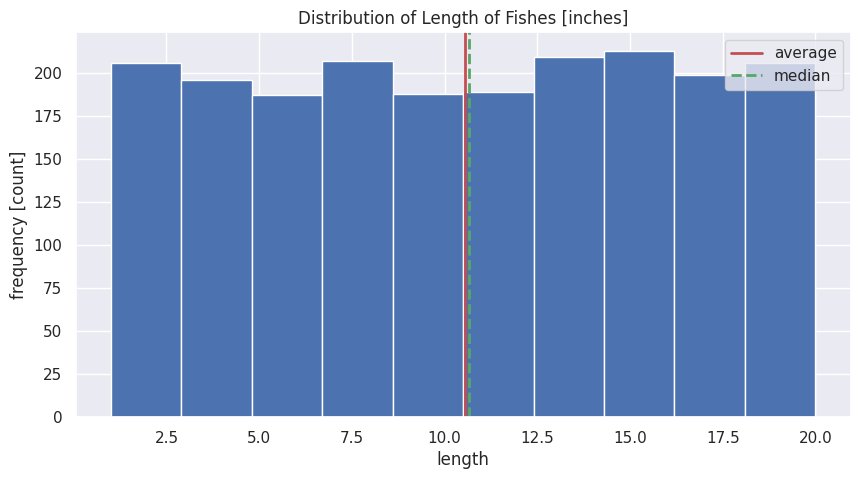

In [7]:
#@title Explore average length

# calculate statistics
min = df['average_length(inches))'].min()
max = df['average_length(inches))'].max()
average = df['average_length(inches))'].mean()
median = df['average_length(inches))'].median()

print('Minimum Average Length:', min)
print('Maximum Average Length:', max)
print('Average Length:', round(average, 2))
print('Median Length:', median)

# plot
df['average_length(inches))'].hist()
plt.axvline(average, color = 'r', linewidth = 2, label = 'average')
plt.axvline(median, color = 'g', linestyle = '--', linewidth = 2, label = 'median')

# label the chart
plt.xlabel('length')
plt.ylabel('frequency [count]')
plt.title('Distribution of Length of Fishes [inches]')
plt.legend();

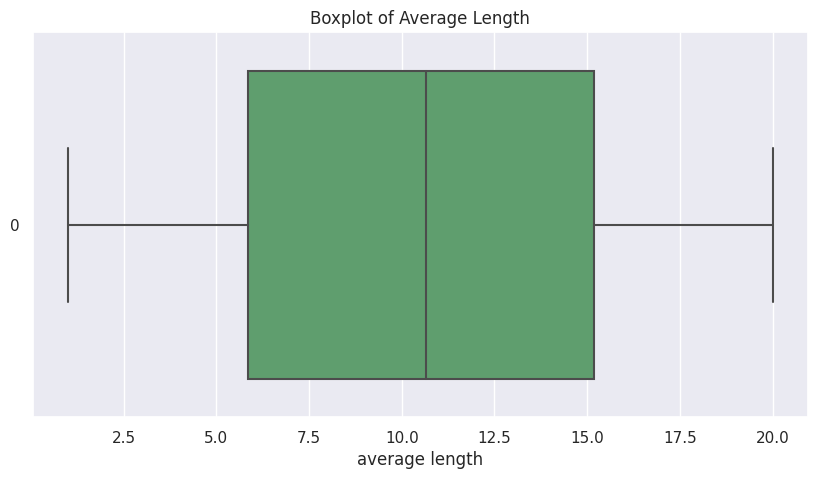

In [8]:
# @title Boxplot of average length
sns.boxplot(df['average_length(inches))'], orient = 'h', color = 'g')

# label chart
plt.xlabel('average length')
plt.title('Boxplot of Average Length');

The `average_length` variable is almost uniformly distributed(well distributed) with the mean and median not so far apart. This is a good feature for linear modelling.

Minimum Average Weight: 2.0
Maximum Average Weight: 18.96
Average Weight: 10.45
Median Weight: 10.455


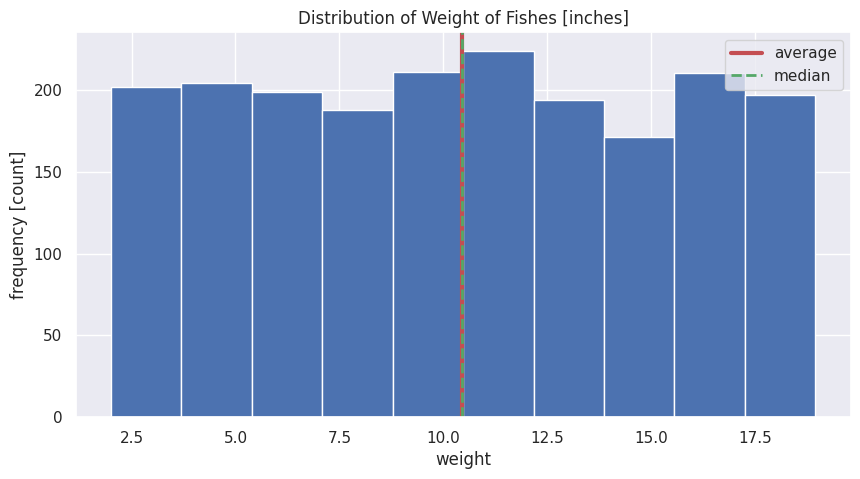

In [9]:
#@title Explore average weigth

# calculate statistics
min = df['average_weight(inches))'].min()
max = df['average_weight(inches))'].max()
average = df['average_weight(inches))'].mean()
median = df['average_weight(inches))'].median()

print('Minimum Average Weight:', min)
print('Maximum Average Weight:', max)
print('Average Weight:', round(average, 2))
print('Median Weight:', median)

# plot
df['average_weight(inches))'].hist()
plt.axvline(average, color = 'r', linewidth = 3, label = 'average')
plt.axvline(median, color = 'g', linestyle = '--', linewidth = 2, label = 'median')

# label the chart
plt.xlabel('weight')
plt.ylabel('frequency [count]')
plt.title('Distribution of Weight of Fishes [inches]')
plt.legend();

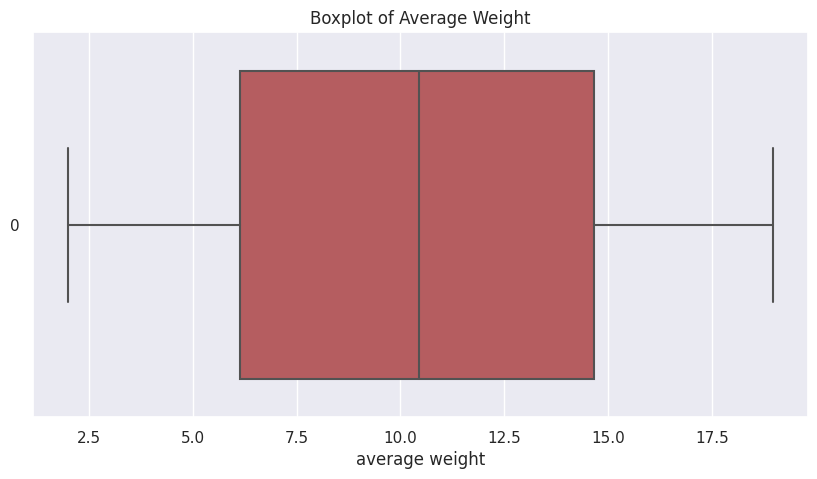

In [10]:
# @title Boxplot of average weight
sns.boxplot(df['average_weight(inches))'], orient = 'h', color = 'r')

# label chart
plt.xlabel('average weight')
plt.title('Boxplot of Average Weight');

The `average_weight` variable too is uniformly distributed with the mean and median almost the same.

There are 5 different habitats in the dataset and they are: ['ponds' 'idlewater' 'lakes' 'rivers' 'slowmovingwaters']

Distribution of Habitats:
-------------------------
lakes               418
ponds               406
slowmovingwaters    396
rivers              395
idlewater           385
Name: habitat, dtype: int64



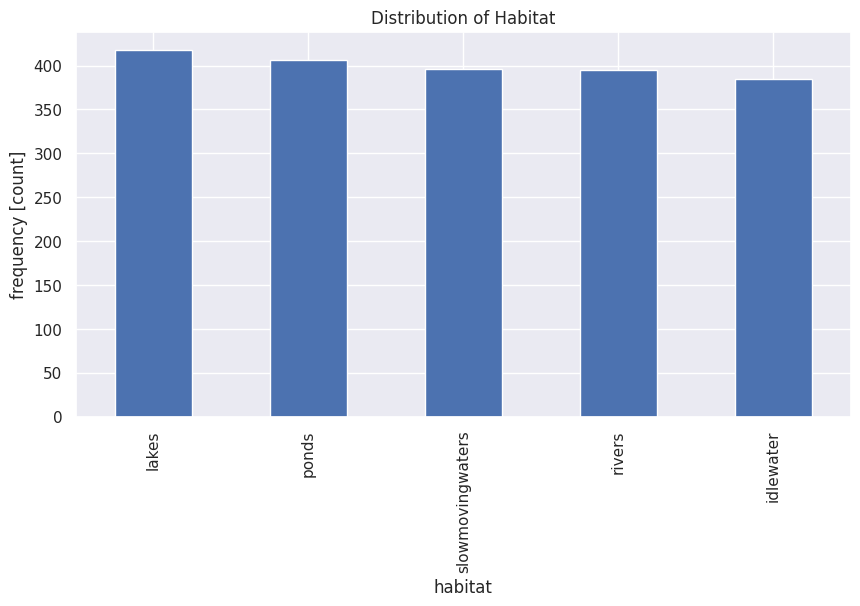

In [11]:
#@title Explore habitat

# number of unique habitats
Nunique = df['habitat'].nunique()

# unique habitats
Unique = df['habitat'].unique()

# distribution of habitats
dis = df['habitat'].value_counts()
print('There are {} different habitats in the dataset and they are: {}'.format(Nunique, Unique))
print('')
print('Distribution of Habitats:')
print('-'*25)
print(dis)
print('')

# visualize distribution
dis.plot.bar()

# label axis
plt.xlabel('habitat')
plt.ylabel('frequency [count]')
plt.title('Distribution of Habitat');

Minimum PH: 6.0
Maximum PH: 8.0
Average PH: 7.01
Median PH: 7.0


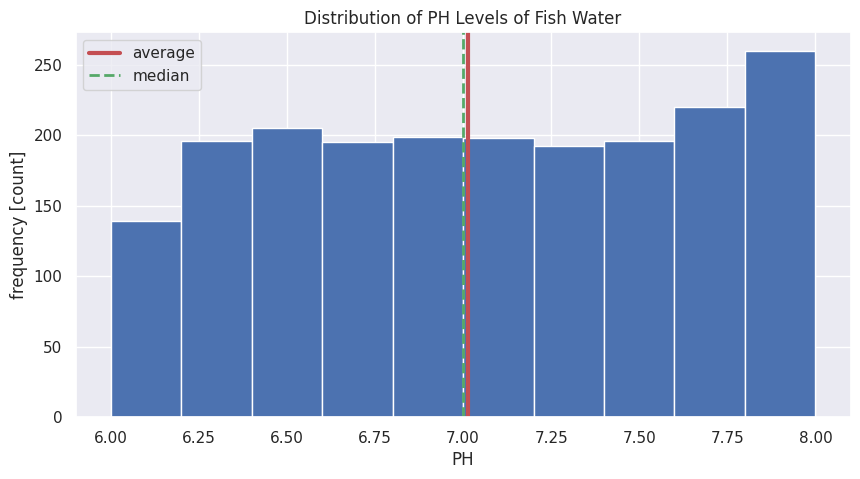

In [12]:
#@title Explore PH of Water

# calculate statistics
min = df['ph_of_water'].min()
max = df['ph_of_water'].max()
average = df['ph_of_water'].mean()
median = df['ph_of_water'].median()

print('Minimum PH:', min)
print('Maximum PH:', max)
print('Average PH:', round(average, 2))
print('Median PH:', median)

# plot
df['ph_of_water'].hist()
plt.axvline(average, color = 'r', linewidth = 3, label = 'average')
plt.axvline(median, color = 'g', linestyle = '--', linewidth = 2, label = 'median')

# label the chart
plt.xlabel('PH')
plt.ylabel('frequency [count]')
plt.title('Distribution of PH Levels of Fish Water')
plt.legend();

The dataset has 9 unique fish colors and they are as follow: ['Reddish_Orange' 'Calico' 'White' 'Orange' 'Red_and_Silver'
 'Black_and_Orange' 'Yellow' 'Red_and_White_Bi_Color'
 'Green_and_Chocolate']

Distribution of Fish Colors:
Green_and_Chocolate       257
Yellow                    241
Orange                    240
Red_and_Silver            240
Black_and_Orange          217
Reddish_Orange            214
Calico                    209
Red_and_White_Bi_Color    192
White                     190
Name: color, dtype: int64



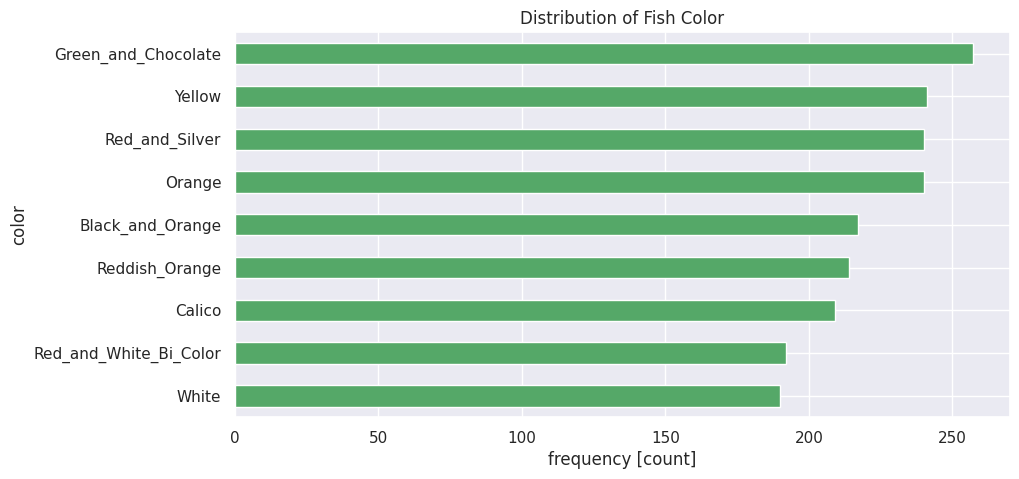

In [13]:
#@title Explore Fish Color

# number of unique colors
nColor = df['color'].nunique()

# colors
Colors = df['color'].unique()
print('The dataset has {} unique fish colors and they are as follow: {}'.format(nColor, Colors))
print('')    # for space
# distribution of fish colors
print('Distribution of Fish Colors:')
print('='*30)
dis = df['color'].value_counts()
print(dis)
print('')    # space

# visualize distribution of colors
dis.sort_values(ascending = True).plot.barh(color = 'g')

# label chart
plt.xlabel('frequency [count]')
plt.ylabel('color')
plt.title('Distribution of Fish Color');

In [14]:
#@title Explore Gender
Gdis = df['Gender'].value_counts()
Gdis

False    1007
True      969
Name: Gender, dtype: int64

In [15]:
df['Gender'].unique()

array([False, True, nan], dtype=object)

According to the data dictionary, `True` == `Male` and `False` == `Female`. And it can be seen that, there are slightly more females than male fishes.
This variable has some missing values too, they will all be soon imputed.

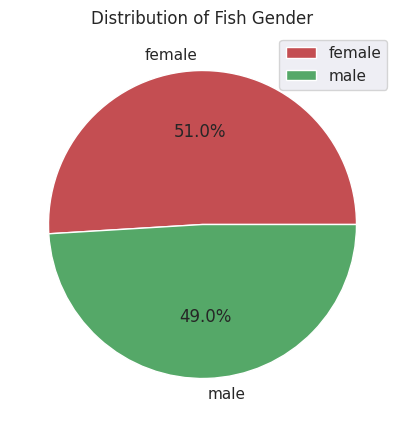

In [16]:
# visualize gender distribution
plt.pie(Gdis, labels = ['female', 'male'], colors = ['r', 'g'], autopct='%1.1f%%')

# label chart
plt.title('Distribution of Fish Gender')
plt.legend();

In [17]:
df.columns

Index(['id', 'average_length(inches))', 'average_weight(inches))', 'habitat',
       'ph_of_water', 'color', 'Gender', 'life_span'],
      dtype='object')

Minimum Life Span: 1.0 year
Maximum Life Span: 28.0 years
Average Life Span: 14.3715 years
Median Life Span: 14.4 years


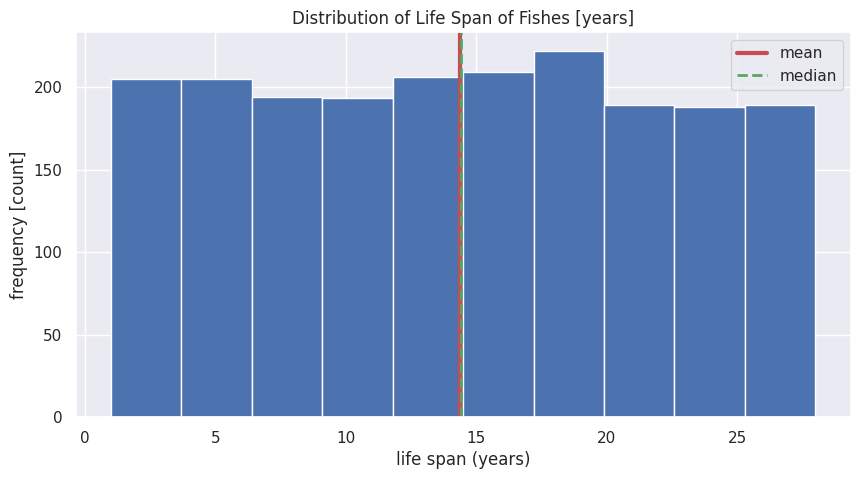

In [18]:
#@title Explore Life Span

# calculate statistics
min = df['life_span'].min()
max = df['life_span'].max()
mean = df['life_span'].mean()
median = df['life_span'].median()

print('Minimum Life Span:', min, 'year')
print('Maximum Life Span:', max, 'years')
print('Average Life Span:', mean, 'years')
print('Median Life Span:', median, 'years')

# plot distribution
df['life_span'].hist()
plt.axvline(mean, color = 'r', linewidth = '3', label = 'mean')
plt.axvline(median, color = 'g', linewidth = '2', linestyle = '--', label = 'median')

# label chart
plt.xlabel('life span (years)')
plt.ylabel('frequency [count]')
plt.title('Distribution of Life Span of Fishes [years]')
plt.legend();

The `life span` variable is uniformly distributed with the mean and median almost the same

# **Bivariate & Multivariate EDA**

In [19]:
df.columns

Index(['id', 'average_length(inches))', 'average_weight(inches))', 'habitat',
       'ph_of_water', 'color', 'Gender', 'life_span'],
      dtype='object')

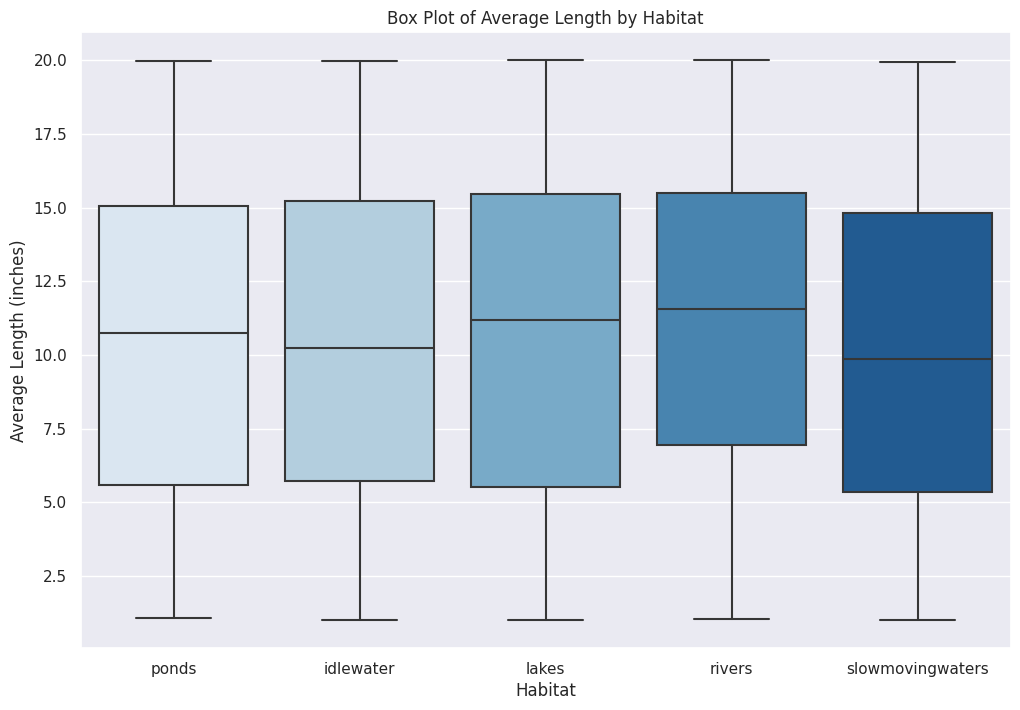

In [20]:
#@title Average length per habitat (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='habitat', y='average_length(inches))', data=df, palette='Blues')
plt.title('Box Plot of Average Length by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Average Length (inches)')
plt.show()

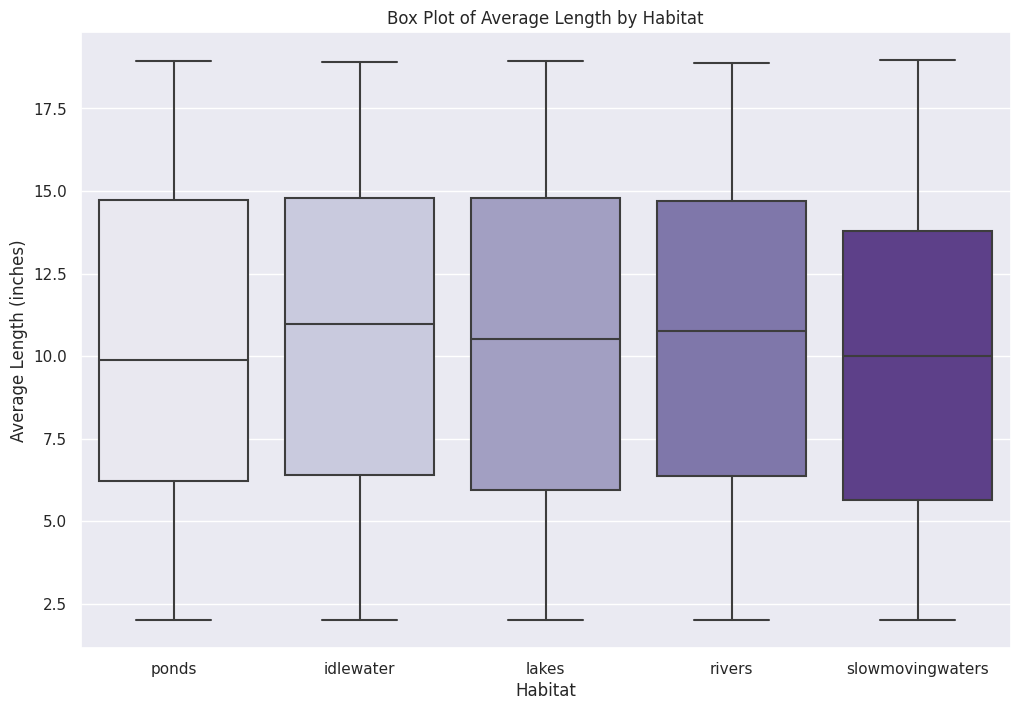

In [21]:
#@title Average weight per habitat (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='habitat', y='average_weight(inches))', data=df, palette='Purples')
plt.title('Box Plot of Average Length by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Average Length (inches)')
plt.show()

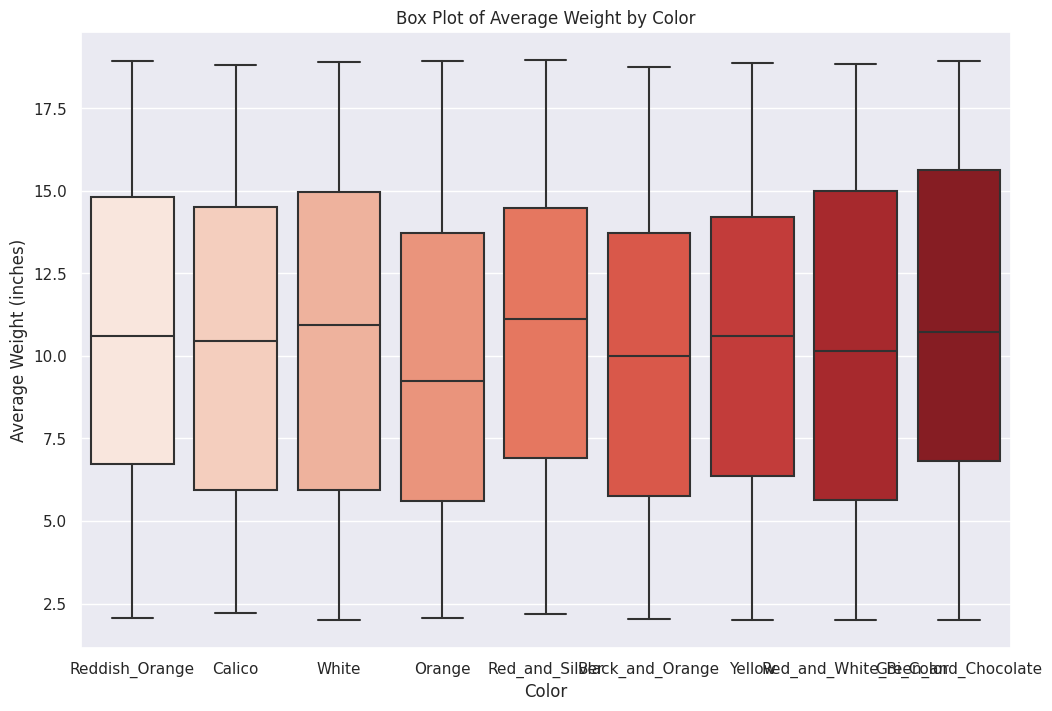

In [22]:
#@title Average weight per color (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='color', y='average_weight(inches))', data=df, palette='Reds')
plt.title('Box Plot of Average Weight by Color')
plt.xlabel('Color')
plt.ylabel('Average Weight (inches)')
plt.show()

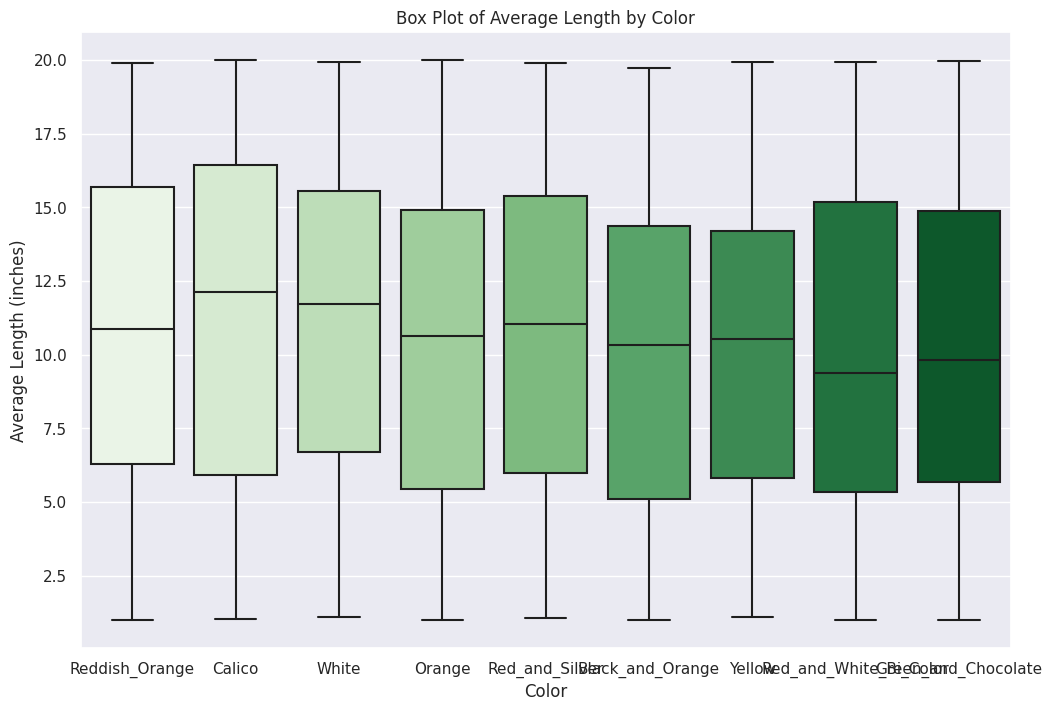

In [23]:
#@title Average length per color (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='color', y='average_length(inches))', data=df, palette='Greens')
plt.title('Box Plot of Average Length by Color')
plt.xlabel('Color')
plt.ylabel('Average Length (inches)')
plt.show()

In [24]:
df.columns

Index(['id', 'average_length(inches))', 'average_weight(inches))', 'habitat',
       'ph_of_water', 'color', 'Gender', 'life_span'],
      dtype='object')

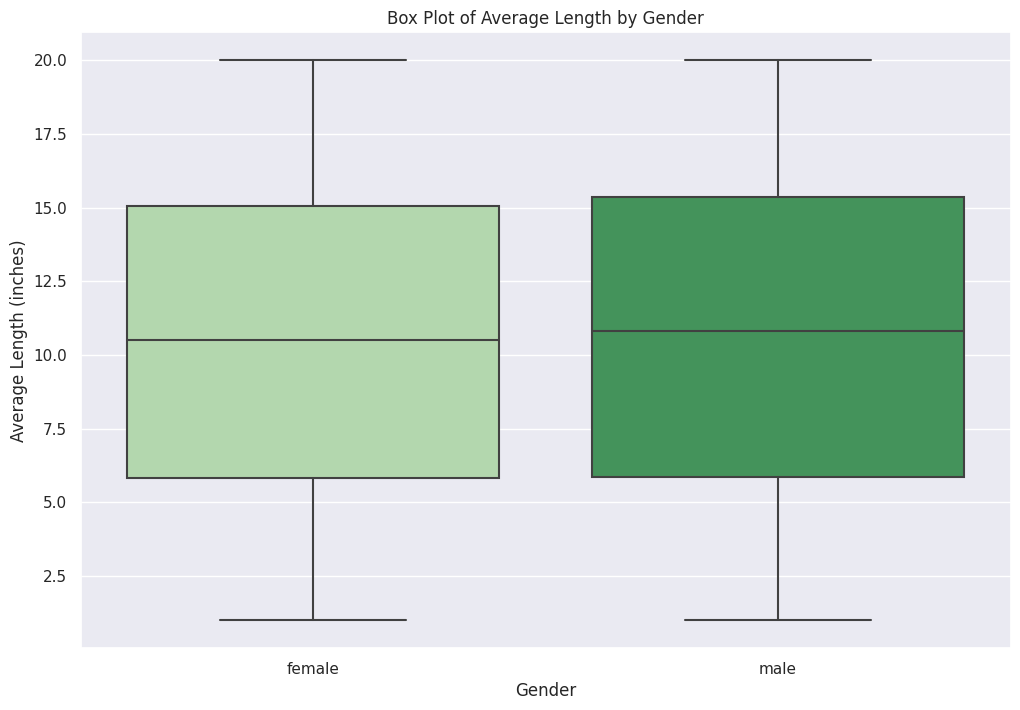

In [25]:
#@title Average length per gender (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='average_length(inches))', data=df, palette='Greens')
plt.title('Box Plot of Average Length by Gender')
plt.xlabel('Gender')
plt.xticks([0, 1], ['female', 'male'])
plt.ylabel('Average Length (inches)')
plt.show()

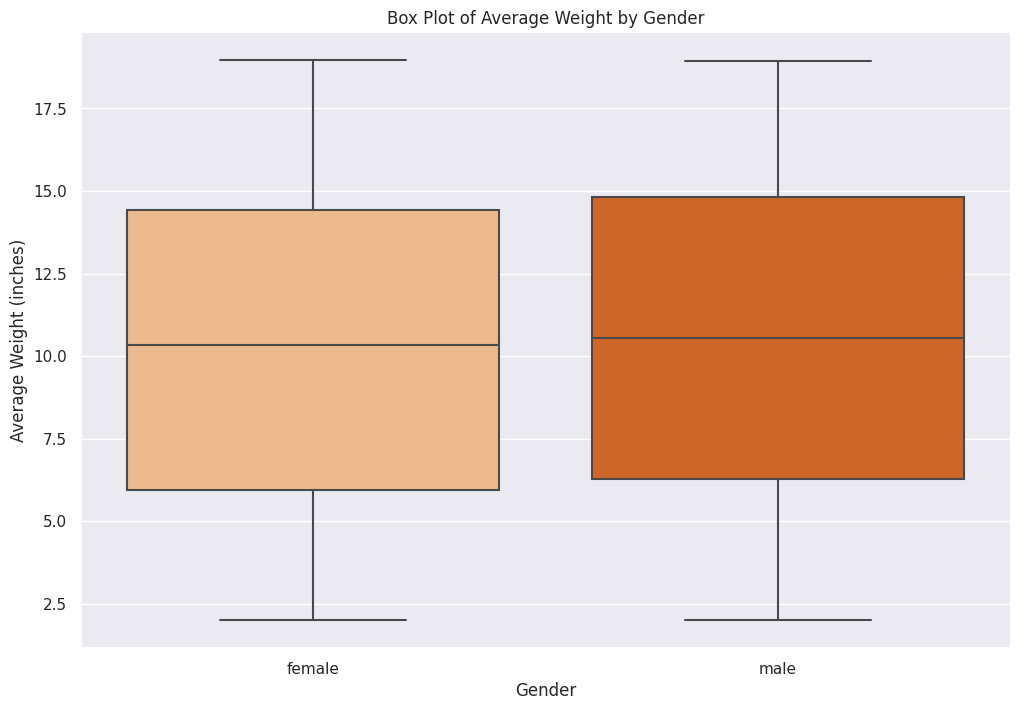

In [26]:
#@title Average weight per gender (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Gender', y='average_weight(inches))', data=df, palette='Oranges')
plt.title('Box Plot of Average Weight by Gender')
plt.xlabel('Gender')
plt.xticks([0, 1], ['female', 'male'])
plt.ylabel('Average Weight (inches)')
plt.show()

In [27]:
# @title Average Length and Weight per Color
lwc = df.groupby('color').aggregate({'average_length(inches))': 'mean', 'average_weight(inches))': 'mean'})
lwc

,average_length(inches)),average_weight(inches))
color,,
Black_and_Orange,9.981336,10.022488
Calico,11.286890,10.489904
Green_and_Chocolate,10.155486,10.859611
Orange,10.527792,9.826083
Red_and_Silver,10.755708,10.711583
Red_and_White_Bi_Color,10.170417,10.394271
Reddish_Orange,10.752477,10.807757
White,11.187474,10.523842
Yellow,10.340000,10.388257


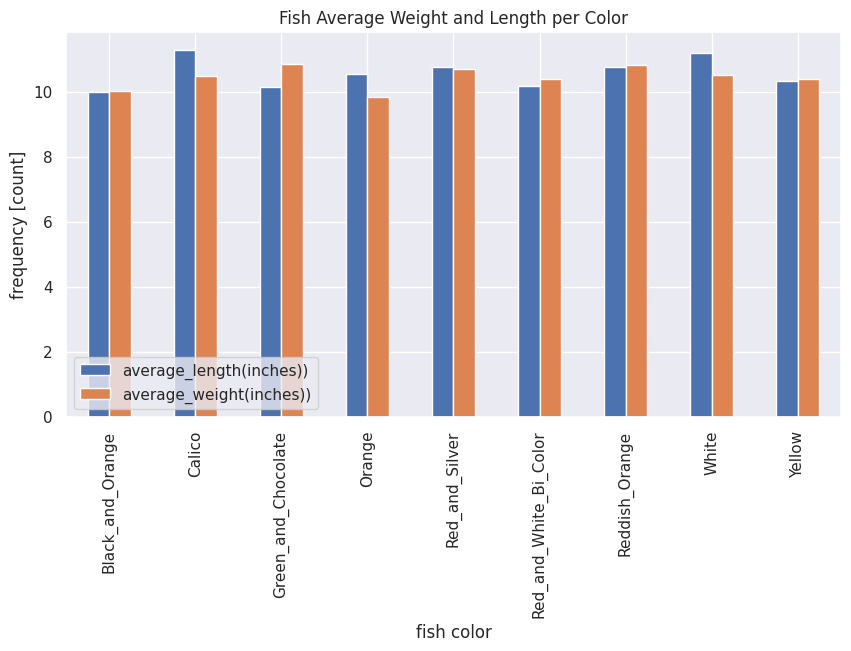

In [28]:
# @title Visualize Average Length and Weight per Color
lwc.plot.bar()

# label chart
plt.xlabel('fish color')
plt.ylabel('frequency [count]')
plt.title('Fish Average Weight and Length per Color')
plt.legend(loc = 'lower left');

In [29]:
# @title Average Weight, Length and PH per Habitat
lwh = df.groupby('habitat').aggregate({'average_length(inches))': 'mean', 'average_weight(inches))': 'mean', 'ph_of_water': 'mean'})
lwh

,average_length(inches)),average_weight(inches)),ph_of_water
habitat,,,
idlewater,10.403299,10.680519,6.983117
lakes,10.649569,10.451124,7.014115
ponds,10.446379,10.294335,7.039163
rivers,11.213316,10.685063,7.032405
slowmovingwaters,10.068030,10.147020,7.004545


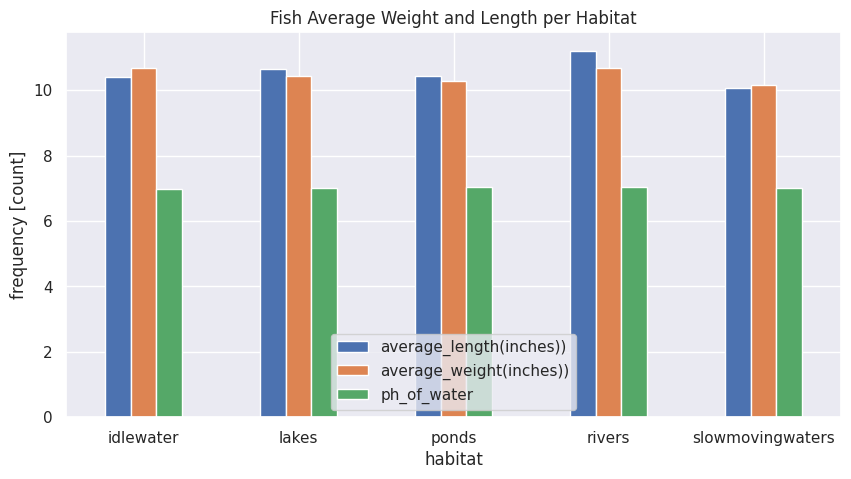

In [30]:
# @title Visualize Average Length and Weight per Habitat
lwh.plot.bar()

# label chart
plt.xlabel('habitat')
plt.ylabel('frequency [count]')
plt.title('Fish Average Weight and Length per Habitat')
plt.xticks(rotation = 0)
plt.legend(loc = 'lower center');

In [31]:
#@title Average Weight and Length per Gender
lwg = df.groupby('Gender').aggregate({'average_length(inches))': 'mean', 'average_weight(inches))': 'mean'}).round(4)
lwg

,average_length(inches)),average_weight(inches))
Gender,,
False,10.4573,10.3095
True,10.6618,10.5946


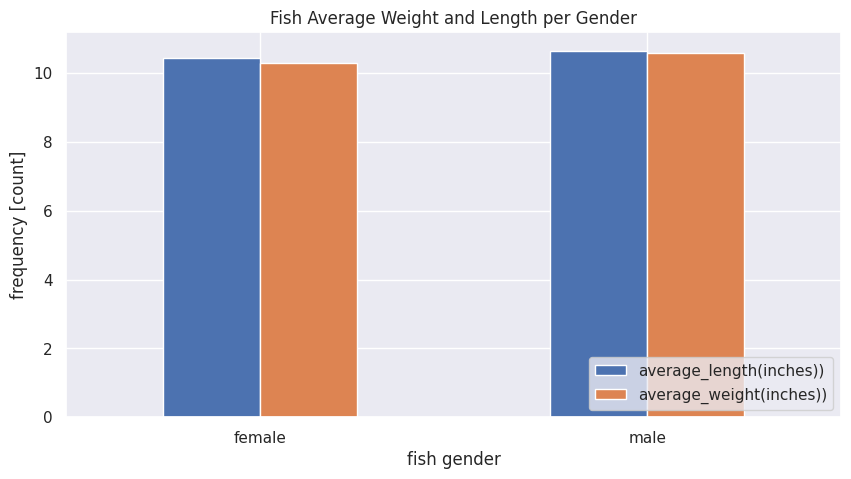

In [32]:
# @title Visualize Average Length and Weight per Gender
lwg.plot.bar()

# label chart
plt.xlabel('fish gender')
plt.ylabel('frequency [count]')
plt.title('Fish Average Weight and Length per Gender')
plt.xticks([0, 1], ['female', 'male'], rotation = 0)
plt.legend(loc = 'lower right');

In [33]:
#@title Average Life Span per Gender
df.groupby('Gender').aggregate({'life_span': 'mean'})

,life_span
Gender,
False,14.403078
True,14.374407


In [34]:
#@title Average life span per color
lsc = df.groupby('color').aggregate({'life_span': 'mean'}).round(4)
lsc

,life_span
color,
Black_and_Orange,13.8682
Calico,14.9909
Green_and_Chocolate,14.4498
Orange,14.2462
Red_and_Silver,14.5708
Red_and_White_Bi_Color,14.0031
Reddish_Orange,14.5491
White,13.7416
Yellow,14.7627


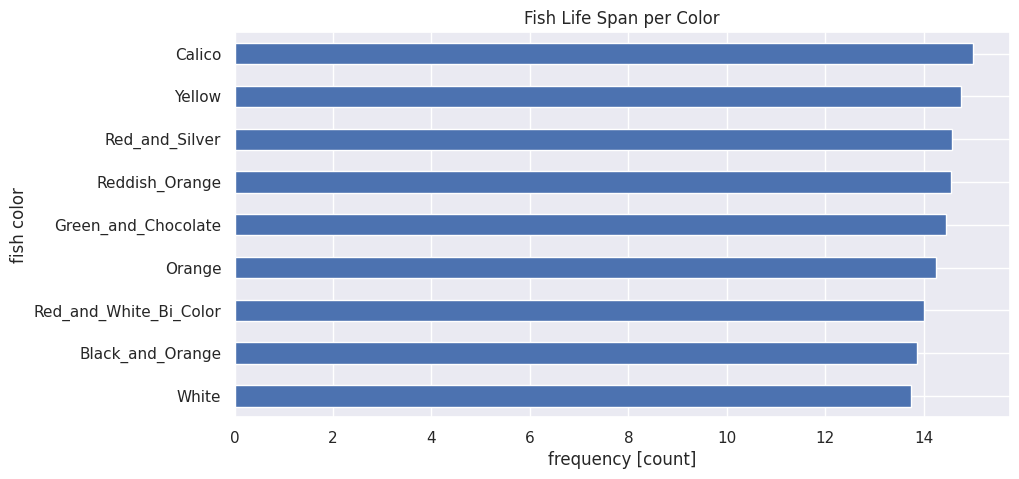

In [35]:
# @title Fish Life Span per Color
lsc.sort_values(by = 'life_span').plot.barh(legend = None);

# label chart
plt.ylabel('fish color')
plt.xlabel('frequency [count]')
plt.title('Fish Life Span per Color');

In [36]:
#@title Average life span per habitat
lsh = df.groupby('habitat').aggregate({'life_span': 'mean'}).round(4)
lsh

,life_span
habitat,
idlewater,13.8239
lakes,14.2184
ponds,14.2244
rivers,14.7565
slowmovingwaters,14.8323


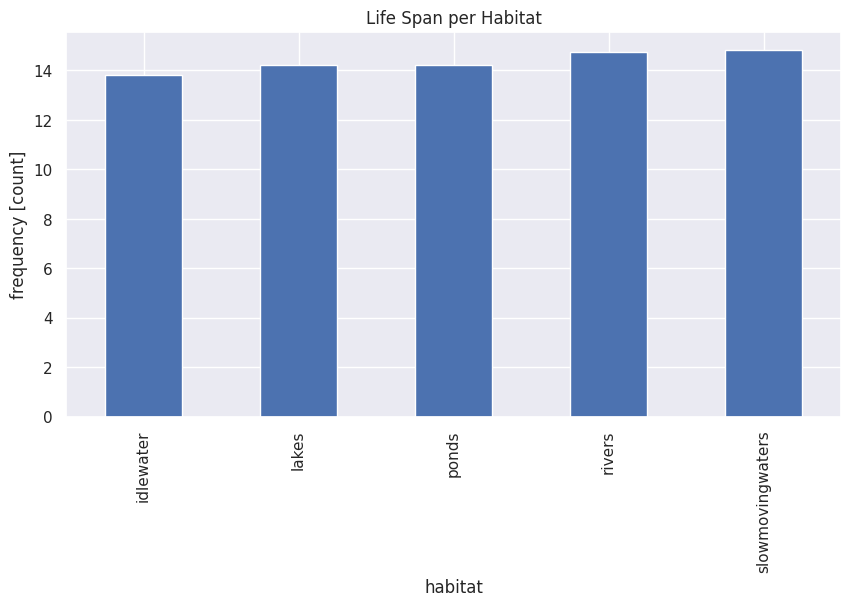

In [37]:
# @title Visualize Life Span per Habitat
lsh.plot.bar(legend = None)

# label chart
plt.xlabel('habitat')
plt.ylabel('frequency [count]')
plt.title('Life Span per Habitat');

# Data Preprocessing

In [38]:
# number of missing values in Gender
df['Gender'].isna().sum()

24

In [39]:
# impute the missing values in the Gender variable (mode)
mode = df['Gender'].mode()[0]    # get the mode

# impute
df['Gender'].fillna(mode, inplace = True)
df['Gender'].isna().sum()

0

In [40]:
df['Gender'].unique()

array([False,  True])

In [41]:
# rename the column titles
df.columns = ['id', 'average_length', 'average_weight', 'habitat', 'ph_of_water', 'color', 'gender', 'life_span']
df.columns

Index(['id', 'average_length', 'average_weight', 'habitat', 'ph_of_water',
       'color', 'gender', 'life_span'],
      dtype='object')

In [42]:
# @title Encode gender
# 1 -- male(True)
# 0 -- female(False)
df['gender'] = df['gender'].apply(lambda x:1 if x == True else 0)
df['gender'].head()

0    0
1    1
2    1
3    0
4    1
Name: gender, dtype: int64

In [43]:
df.head()

,id,average_length,average_weight,habitat,ph_of_water,color,gender,life_span
0,1,14.69,5.87,ponds,6.2,Reddish_Orange,0,10.9
1,2,1.32,3.86,idlewater,6.8,Calico,1,5.2
2,3,14.23,12.09,lakes,7.9,Reddish_Orange,1,25.3
3,4,2.54,3.20,rivers,6.7,White,0,16.4
4,5,13.10,9.81,lakes,7.8,Orange,1,3.2


In [44]:
#@title Encode fish color

# create a map
color_map = {
    'Reddish_Orange': 1,
    'Calico': 2,
    'White': 3,
    'Orange': 4,
    'Red_and_Silver':5,
    'Black_and_Orange': 6,
    'Yellow': 7,
    'Red_and_White_Bi_Color':8,
    'Green_and_Chocolate': 9
}

# encode colors with the map
df['color'] = df['color'].map(color_map)

# validate the encoding
df['color'].head()

0    1
1    2
2    1
3    3
4    4
Name: color, dtype: int64

In [45]:
#@title Encode habitat

# create a map
habitat_map = {
    'ponds': 1,
    'idlewater' : 2,
    'lakes' : 3,
    'rivers' : 4,
    'slowmovingwaters' : 5
}

# encode habitat with the map
df['habitat'] = df['habitat'].map(habitat_map)

# validate the encoding
df['habitat'].sample(5)

568     1
499     5
1420    4
877     5
607     3
Name: habitat, dtype: int64

In [46]:
df.head()

,id,average_length,average_weight,habitat,ph_of_water,color,gender,life_span
0,1,14.69,5.87,1,6.2,1,0,10.9
1,2,1.32,3.86,2,6.8,2,1,5.2
2,3,14.23,12.09,3,7.9,1,1,25.3
3,4,2.54,3.20,4,6.7,3,0,16.4
4,5,13.10,9.81,3,7.8,4,1,3.2


In [47]:
#@title Multivariate EDA
correlation = df.corr()
correlation

,id,average_length,average_weight,habitat,ph_of_water,color,gender,life_span
id,1.000000,0.006408,0.012655,-0.008822,-0.011104,0.011846,-0.003203,-0.027997
average_length,0.006408,1.000000,0.029553,0.001346,-0.018249,-0.060492,0.018394,0.000354
average_weight,0.012655,0.029553,1.000000,-0.007936,-0.012242,0.002261,0.028806,0.034900
habitat,-0.008822,0.001346,-0.007936,1.000000,-0.005367,0.002883,0.019020,0.038944
ph_of_water,-0.011104,-0.018249,-0.012242,-0.005367,1.000000,-0.017121,-0.037756,-0.037913
color,0.011846,-0.060492,0.002261,0.002883,-0.017121,1.000000,-0.005004,-0.008135
gender,-0.003203,0.018394,0.028806,0.019020,-0.037756,-0.005004,1.000000,0.000366
life_span,-0.027997,0.000354,0.034900,0.038944,-0.037913,-0.008135,0.000366,1.000000


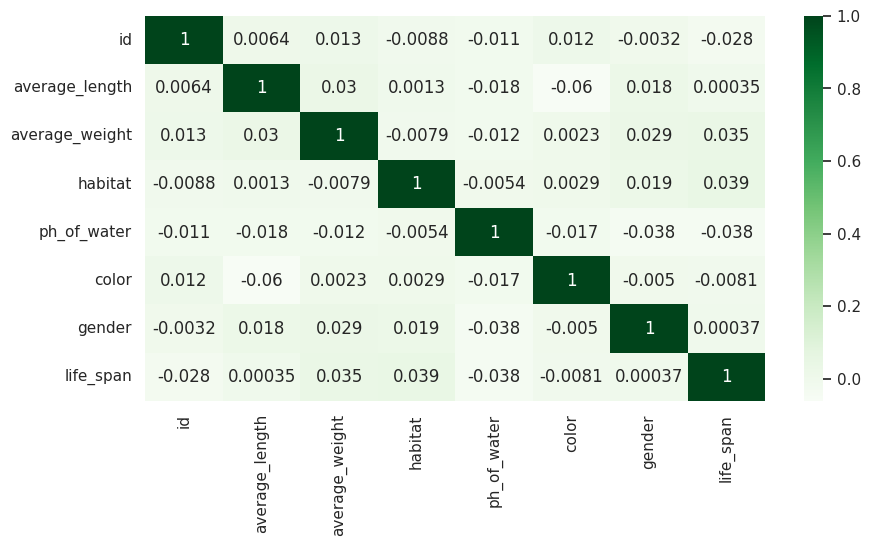

In [48]:
# visualize correlation
sns.heatmap(correlation, cmap='Greens', annot=True);

In [49]:
#@title Split dataset for training
X = df.drop(columns = ['id', 'life_span'], axis = 1)
y = df['life_span']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (2000, 6)
y shape: (2000,)


In [50]:
# take a look at the independent variables
from google.colab import data_table
data_table.DataTable(X)

,average_length,average_weight,habitat,ph_of_water,color,gender
0,14.69,5.87,1,6.2,1,0
1,1.32,3.86,2,6.8,2,1
2,14.23,12.09,3,7.9,1,1
3,2.54,3.20,4,6.7,3,0
4,13.10,9.81,3,7.8,4,1
...,...,...,...,...,...,...
1995,16.12,6.46,1,8.0,8,0
1996,7.50,7.07,4,6.3,6,1
1997,10.52,3.27,5,6.1,4,1
1998,7.70,15.41,1,7.8,4,0


In [51]:
#@title split dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.1)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1800, 6)
y_train shape: (1800,)
X_test shape: (200, 6)
y_test shape: (200,)


In [52]:
#@title build a linear regression model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_train)
y_pred

array([14.01234228, 14.45262041, 14.45225693, ..., 13.8858664 ,
       14.14020455, 14.621662  ])

In [53]:
#@title evaluate the regression model (training Mean Absolute Error)
training_mae = mean_absolute_error(y_train, y_pred)
training_mae

6.6698692913995385

In [54]:
#@title evaluate the regression model (testing Mean Absolute Error)
mean_absolute_error(model.predict(X_test), y_test)

6.300204803328836

In [55]:
#@title Build a Ridge regression model

# hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}

# perform a gridsearch
grid_search = GridSearchCV(
    estimator = Ridge(),
    param_grid = params,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}, verbose=1)

In [56]:
#@title Get the best hyperparameter for the Ridge regression
best_param = grid_search.best_params_
best_param

{'alpha': 100}

In [57]:
#@title build a ridge regression model with the best hyperparameter
m = Ridge(**best_param)

# train model
m.fit(X_train, y_train)

Ridge(alpha=100)

In [58]:
#@title make predictions
y_pred = m.predict(X_train)
y_pred

array([14.0622845 , 14.51909922, 14.46832229, ..., 13.96487648,
       14.10895897, 14.57641998])

In [59]:
#@title evaluate model(training performance)
training_mae = mean_absolute_error(y_train, y_pred)
training_mae

6.671253618720128

In [60]:
#@title evaluate model(testing performance)
mean_absolute_error(m.predict(X_test), y_test)

6.298770655257158

In [61]:
#@title Build a Lasso regression model

# hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}

# perform a gridsearch
grid_search = GridSearchCV(
    estimator = Lasso(),
    param_grid = params,
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]}, verbose=1)

In [62]:
#@title Get the best hyperparameter for the Lasso regression
best_param = grid_search.best_params_
best_param

{'alpha': 10}

In [63]:
#@title build a lasso regression model with the best hyperparameter
l = Lasso(**best_param)

# train model
l.fit(X_train, y_train)

Lasso(alpha=10)

In [64]:
#@title make predictions
y_pred = l.predict(X_train)
y_pred

array([14.45444444, 14.45444444, 14.45444444, ..., 14.45444444,
       14.45444444, 14.45444444])

In [65]:
#@title Evaluate model performance(training)
training_mae = mean_absolute_error(y_train, y_pred)
training_mae

6.699879012345679

In [66]:
#@title Evaluate model performance(testing)
mean_absolute_error(l.predict(X_test), y_test)

6.296722222222222

### Perform F-Statistics to select the best independent variables to improve model's performance since it reduces noise in the dataset.

In [67]:
from sklearn.feature_selection import f_regression
f_stat, p_value = f_regression(X, y)

In [68]:
#@title convert F values to dataframe
cols = X.columns
pd.DataFrame({
    'feature': cols,
    'f-statistic': f_stat,
    'p-value': p_value,
})

,feature,f-statistic,p-value
0,average_length,0.000250,0.987381
1,average_weight,2.436540,0.118696
2,habitat,3.034794,0.081651
3,ph_of_water,2.875982,0.090066
4,color,0.132228,0.716172
5,gender,0.000267,0.986957




```
It can be seen that picking α = 0.05, all the variables are not significant.
This is can even be seen from the correlation heatmap
(very weak correlation with the dependent variable).
This happens a lot and it is not a crime.
It simply suggesting that, the independent variables do not have much
linear relationship with the independent variable❌.
However, there might be some significant non-linear relationship.
Therefore, using linear models like Linear Regression may not be helpful.
Non-linear models may perform way better✅
```




In [69]:
X.head(2)

,average_length,average_weight,habitat,ph_of_water,color,gender
0,14.69,5.87,1,6.2,1,0
1,1.32,3.86,2,6.8,2,1


In [78]:
#@title Deploy one of the models(using gradio)

# create function for the model
def predict(average_length, average_weight, habitat, ph_of_water, color,gender):
  # convert user inputs into dataframe
  df = pd.DataFrame({
      'average_length': [average_length],
      'average_weight': [average_weight],
      'habitat': [habitat],
      'ph_of_water': [ph_of_water],
      'color': [color],
      'gender': [gender]
  })
  # make prediction
  pred = round(model.predict(df)[0], 4)
  return pred

In [ ]:
!pip install gradio

In [80]:
import gradio as gr

app = gr.Interface(
    title = 'Predict Goldfish Life Span',
    fn = predict,
    inputs = ['number', 'number', 'number', 'number', 'number', 'number'],
    outputs = 'number'
)
app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ca437b43fca8abba22.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [76]:
predict(04.69, 5.87, 1, 6.2, 1, 0)

In [77]:
y.head(1)

0    10.9
Name: life_span, dtype: float64